<h3>About Dataset</h3>

The implemented attacks include Brute Force FTP, Brute Force SSH, DoS, Heartbleed, Web Attack, Infiltration, Botnet and DDoS. They have been executed both morning and afternoon on Tuesday, Wednesday, Thursday and Friday.

<br>Day, Description
<br>
<br>Monday, Normal Activity
<br>Tuesday, attacks + Normal Activity
<br>Wednesday, attacks + Normal Activity
<br>Thursday, attacks + Normal Activity
<br>Friday, attacks + Normal Activity
<br>
<br>They have split the csv into 8 different files (for the different days)

In [ ]:
import numpy as np 
import pandas as pd 
import glob
import time
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.utils import class_weight
from sklearn.metrics import accuracy_score, precision_score, recall_score,f1_score
from sklearn.metrics import classification_report

import tensorflow as tf
from tensorflow.keras import regularizers

In [ ]:
# display all columns
pd.set_option("display.max_columns", None)

In [ ]:
# path to where ML files are stored
path = 'C:/Users/Mr.Dmon/Downloads/Datasets/CICIDS/MachineLearningCSV/'
all_files = glob.glob(path + "/*.csv")

# concatenate the 8 files into 1
dataset = pd.concat((pd.read_csv(f) for f in all_files))

**Add column labels**

In [ ]:
col_names = ["Destination_Port",
             "Flow_Duration", 
             "Total_Fwd_Packets",
             "Total_Backward_Packets",
             "Total_Length_of_Fwd_Packets", 
             "Total_Length_of_Bwd_Packets", 
             "Fwd_Packet_Length_Max", 
             "Fwd_Packet_Length_Min", 
             "Fwd_Packet_Length_Mean", 
             "Fwd_Packet_Length_Std",
             "Bwd_Packet_Length_Max", 
             "Bwd_Packet_Length_Min", 
             "Bwd_Packet_Length_Mean", 
             "Bwd_Packet_Length_Std",
             "Flow_Bytes_s", 
             "Flow_Packets_s", 
             "Flow_IAT_Mean", 
             "Flow_IAT_Std", 
             "Flow_IAT_Max", 
             "Flow_IAT_Min",
             "Fwd_IAT_Total", 
             "Fwd_IAT_Mean", 
             "Fwd_IAT_Std", 
             "Fwd_IAT_Max", 
             "Fwd_IAT_Min",
             "Bwd_IAT_Total", 
             "Bwd_IAT_Mean", 
             "Bwd_IAT_Std", 
             "Bwd_IAT_Max", 
             "Bwd_IAT_Min",
             "Fwd_PSH_Flags", 
             "Bwd_PSH_Flags", 
             "Fwd_URG_Flags", 
             "Bwd_URG_Flags", 
             "Fwd_Header_Length", 
             "Bwd_Header_Length",
             "Fwd_Packets_s", 
             "Bwd_Packets_s", 
             "Min_Packet_Length", 
             "Max_Packet_Length", 
             "Packet_Length_Mean", 
             "Packet_Length_Std", 
             "Packet_Length_Variance",
             "FIN_Flag_Count", 
             "SYN_Flag_Count", 
             "RST_Flag_Count", 
             "PSH_Flag_Count", 
             "ACK_Flag_Count", 
             "URG_Flag_Count", 
             "CWE_Flag_Count", 
             "ECE_Flag_Count", 
             "Down_Up_Ratio", 
             "Average_Packet_Size", 
             "Avg_Fwd_Segment_Size", 
             "Avg_Bwd_Segment_Size", 
             "Fwd_Header_Length",
             "Fwd_Avg_Bytes_Bulk", 
             "Fwd_Avg_Packets_Bulk", 
             "Fwd_Avg_Bulk_Rate", 
             "Bwd_Avg_Bytes_Bulk", 
             "Bwd_Avg_Packets_Bulk",
             "Bwd_Avg_Bulk_Rate",
             "Subflow_Fwd_Packets", 
             "Subflow_Fwd_Bytes", 
             "Subflow_Bwd_Packets", 
             "Subflow_Bwd_Bytes",
             "Init_Win_bytes_forward", 
             "Init_Win_bytes_backward", 
             "act_data_pkt_fwd", 
             "min_seg_size_forward",
             "Active_Mean", 
             "Active_Std", 
             "Active_Max", 
             "Active_Min",
             "Idle_Mean", 
             "Idle_Std", 
             "Idle_Max", 
             "Idle_Min", 
             "Label"
            ]


# Assign the column names
dataset.columns = col_names

In [ ]:
dataset.shape

(2830743, 79)

In [ ]:
dataset.head()

,Destination_Port,Flow_Duration,Total_Fwd_Packets,Total_Backward_Packets,Total_Length_of_Fwd_Packets,Total_Length_of_Bwd_Packets,Fwd_Packet_Length_Max,Fwd_Packet_Length_Min,Fwd_Packet_Length_Mean,Fwd_Packet_Length_Std,Bwd_Packet_Length_Max,Bwd_Packet_Length_Min,Bwd_Packet_Length_Mean,Bwd_Packet_Length_Std,Flow_Bytes_s,Flow_Packets_s,Flow_IAT_Mean,Flow_IAT_Std,Flow_IAT_Max,Flow_IAT_Min,Fwd_IAT_Total,Fwd_IAT_Mean,Fwd_IAT_Std,Fwd_IAT_Max,Fwd_IAT_Min,Bwd_IAT_Total,Bwd_IAT_Mean,Bwd_IAT_Std,Bwd_IAT_Max,Bwd_IAT_Min,Fwd_PSH_Flags,Bwd_PSH_Flags,Fwd_URG_Flags,Bwd_URG_Flags,Fwd_Header_Length,Bwd_Header_Length,Fwd_Packets_s,Bwd_Packets_s,Min_Packet_Length,Max_Packet_Length,Packet_Length_Mean,Packet_Length_Std,Packet_Length_Variance,FIN_Flag_Count,SYN_Flag_Count,RST_Flag_Count,PSH_Flag_Count,ACK_Flag_Count,URG_Flag_Count,CWE_Flag_Count,ECE_Flag_Count,Down_Up_Ratio,Average_Packet_Size,Avg_Fwd_Segment_Size,Avg_Bwd_Segment_Size,Fwd_Header_Length,Fwd_Avg_Bytes_Bulk,Fwd_Avg_Packets_Bulk,Fwd_Avg_Bulk_Rate,Bwd_Avg_Bytes_Bulk,Bwd_Avg_Packets_Bulk,Bwd_Avg_Bulk_Rate,Subflow_Fwd_Packets,Subflow_Fwd_Bytes,Subflow_Bwd_Packets,Subflow_Bwd_Bytes,Init_Win_bytes_forward,Init_Win_bytes_backward,act_data_pkt_fwd,min_seg_size_forward,Active_Mean,Active_Std,Active_Max,Active_Min,Idle_Mean,Idle_Std,Idle_Max,Idle_Min,Label
0,54865,3,2,0,12,0,6,6,6.0,0.0,0,0,0.0,0.0,4.000000e+06,666666.66670,3.0,0.0,3,3,3,3.0,0.0,3,3,0,0.0,0.0,0,0,0,0,0,0,40,0,666666.666700,0.000000,6,6,6.0,0.0,0.0,0,0,0,0,1,0,0,0,0,9.0,6.0,0.0,40,0,0,0,0,0,0,2,12,0,0,33,-1,1,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
1,55054,109,1,1,6,6,6,6,6.0,0.0,6,6,6.0,0.0,1.100917e+05,18348.62385,109.0,0.0,109,109,0,0.0,0.0,0,0,0,0.0,0.0,0,0,0,0,0,0,20,20,9174.311927,9174.311927,6,6,6.0,0.0,0.0,0,0,0,0,1,1,0,0,1,9.0,6.0,6.0,20,0,0,0,0,0,0,1,6,1,6,29,256,0,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2,55055,52,1,1,6,6,6,6,6.0,0.0,6,6,6.0,0.0,2.307692e+05,38461.53846,52.0,0.0,52,52,0,0.0,0.0,0,0,0,0.0,0.0,0,0,0,0,0,0,20,20,19230.769230,19230.769230,6,6,6.0,0.0,0.0,0,0,0,0,1,1,0,0,1,9.0,6.0,6.0,20,0,0,0,0,0,0,1,6,1,6,29,256,0,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
3,46236,34,1,1,6,6,6,6,6.0,0.0,6,6,6.0,0.0,3.529412e+05,58823.52941,34.0,0.0,34,34,0,0.0,0.0,0,0,0,0.0,0.0,0,0,0,0,0,0,20,20,29411.764710,29411.764710,6,6,6.0,0.0,0.0,0,0,0,0,1,1,0,0,1,9.0,6.0,6.0,20,0,0,0,0,0,0,1,6,1,6,31,329,0,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
4,54863,3,2,0,12,0,6,6,6.0,0.0,0,0,0.0,0.0,4.000000e+06,666666.66670,3.0,0.0,3,3,3,3.0,0.0,3,3,0,0.0,0.0,0,0,0,0,0,0,40,0,666666.666700,0.000000,6,6,6.0,0.0,0.0,0,0,0,0,1,0,0,0,0,9.0,6.0,0.0,40,0,0,0,0,0,0,2,12,0,0,32,-1,1,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN


<br>**Check whether there are any duplicate columns**<br>

In [ ]:
dataset.columns.duplicated()

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False])

**Delete Duplicate columns**

In [ ]:
dataset = dataset.loc[:, ~dataset.columns.duplicated()]

In [ ]:
dataset.shape

(2830743, 78)

**Remove NaN/Null/Infinite Values**

In [ ]:
# check if there are any Null values
dataset.isnull().any().any()

True

In [ ]:
# Replace Infinite values with NaN
dataset = dataset.replace([np.inf, -np.inf], np.nan)
# Drop all occurences of NaN
dataset = dataset.dropna()
# Double check these are all gone
dataset.isnull().any().any()

False

<br><br>**Rename the web attacks**<br><br>

In [ ]:
dataset.loc[dataset.Label == 'BENIGN', ['Label']] = 'benign'
dataset.loc[dataset.Label == 'DoS Hulk', ['Label']] = 'hulk'
dataset.loc[dataset.Label == 'PortScan', ['Label']] = 'portscan'
dataset.loc[dataset.Label == 'DDoS', ['Label']] = 'ddos'
dataset.loc[dataset.Label == 'DoS GoldenEye', ['Label']] = 'goldeneye'
dataset.loc[dataset.Label == 'FTP-Patator', ['Label']] = 'ftppatator'
dataset.loc[dataset.Label == 'SSH-Patator', ['Label']] = 'sshpatator'
dataset.loc[dataset.Label == 'DoS slowloris', ['Label']] = 'slowloris'
dataset.loc[dataset.Label == 'DoS Slowhttptest', ['Label']] = 'slowhttptest'
dataset.loc[dataset.Label == 'Bot', ['Label']] = 'bot'
dataset.loc[dataset.Label == 'Web Attack � Brute Force', ['Label']] = 'bruteforce'
dataset.loc[dataset.Label == 'Web Attack � XSS', ['Label']] = 'xss'
dataset.loc[dataset.Label == 'Infiltration', ['Label']] = 'infiltration'
dataset.loc[dataset.Label == 'Web Attack � Sql Injection', ['Label']] = 'sql'
dataset.loc[dataset.Label == 'Heartbleed', ['Label']] = 'heartbleed'

<br>**Explore Attacks in Dataset**<br>
<br>

In [ ]:
dataset['Label'].value_counts()

benign          2271320
hulk             230124
portscan         158804
ddos             128025
goldeneye         10293
ftppatator         7935
sshpatator         5897
slowloris          5796
slowhttptest       5499
bot                1956
bruteforce         1507
xss                 652
infiltration         36
sql                  21
heartbleed           11
Name: Label, dtype: int64

In [ ]:
dataset = dataset.replace(['heartbleed', 'sql', 'infiltration','benign','hulk'], np.nan)
dataset = dataset.dropna()

In [ ]:
path2 = 'C:/Users/Mr.Dmon/Documents/datasets/'
All_files = glob.glob(path2 + "/*.csv")
df = pd.concat((pd.read_csv(f) for f in All_files))
frames = [ df,dataset]
dataset = pd.concat(frames)
dataset = dataset.sample(frac=1).reset_index(drop=True)

In [ ]:
dataset['Label'].value_counts()

benign          229556
portscan        158804
ddos            128025
synflood        100834
goldeneye        29112
sql              11698
ftppatator        7935
sshpatator        5897
slowloris         5796
slowhttptest      5499
hulk              3672
bot               1956
bruteforce        1507
xss                652
Name: Label, dtype: int64

**Visualizing Attack Distribution**

C:\Users\Mr.Dmon\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 [Text(0, 0, 'portscan'),
  Text(1, 0, 'slowloris'),
  Text(2, 0, 'ddos'),
  Text(3, 0, 'goldeneye'),
  Text(4, 0, 'synflood'),
  Text(5, 0, 'sql'),
  Text(6, 0, 'sshpatator'),
  Text(7, 0, 'bot'),
  Text(8, 0, 'hulk'),
  Text(9, 0, 'slowhttptest'),
  Text(10, 0, 'bruteforce'),
  Text(11, 0, 'ftppatator'),
  Text(12, 0, 'xss')])

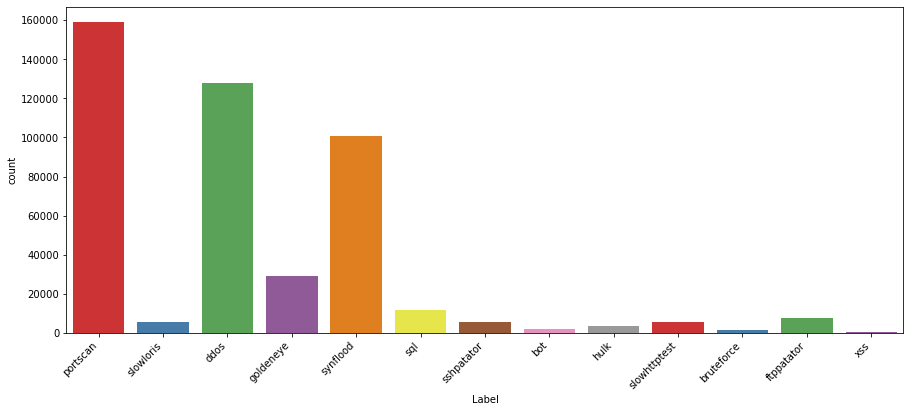

In [ ]:
plt_labels = dataset['Label'].where(dataset['Label'] != "benign")
plt.figure(figsize=(15,6))
chart = sns.countplot(plt_labels, palette="Set1")
plt.xticks(rotation=45, horizontalalignment="right")

In [ ]:
dataset.head()

,Destination_Port,Flow_Duration,Total_Fwd_Packets,Total_Backward_Packets,Total_Length_of_Fwd_Packets,Total_Length_of_Bwd_Packets,Fwd_Packet_Length_Max,Fwd_Packet_Length_Min,Fwd_Packet_Length_Mean,Fwd_Packet_Length_Std,Bwd_Packet_Length_Max,Bwd_Packet_Length_Min,Bwd_Packet_Length_Mean,Bwd_Packet_Length_Std,Flow_Bytes_s,Flow_Packets_s,Flow_IAT_Mean,Flow_IAT_Std,Flow_IAT_Max,Flow_IAT_Min,Fwd_IAT_Total,Fwd_IAT_Mean,Fwd_IAT_Std,Fwd_IAT_Max,Fwd_IAT_Min,Bwd_IAT_Total,Bwd_IAT_Mean,Bwd_IAT_Std,Bwd_IAT_Max,Bwd_IAT_Min,Fwd_PSH_Flags,Bwd_PSH_Flags,Fwd_URG_Flags,Bwd_URG_Flags,Fwd_Header_Length,Bwd_Header_Length,Fwd_Packets_s,Bwd_Packets_s,Min_Packet_Length,Max_Packet_Length,Packet_Length_Mean,Packet_Length_Std,Packet_Length_Variance,FIN_Flag_Count,SYN_Flag_Count,RST_Flag_Count,PSH_Flag_Count,ACK_Flag_Count,URG_Flag_Count,CWE_Flag_Count,ECE_Flag_Count,Down_Up_Ratio,Average_Packet_Size,Avg_Fwd_Segment_Size,Avg_Bwd_Segment_Size,Fwd_Avg_Bytes_Bulk,Fwd_Avg_Packets_Bulk,Fwd_Avg_Bulk_Rate,Bwd_Avg_Bytes_Bulk,Bwd_Avg_Packets_Bulk,Bwd_Avg_Bulk_Rate,Subflow_Fwd_Packets,Subflow_Fwd_Bytes,Subflow_Bwd_Packets,Subflow_Bwd_Bytes,Init_Win_bytes_forward,Init_Win_bytes_backward,act_data_pkt_fwd,min_seg_size_forward,Active_Mean,Active_Std,Active_Max,Active_Min,Idle_Mean,Idle_Std,Idle_Max,Idle_Min,Label
0,40634,1.0,2,0,0,0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,2.000000e+06,1.000000e+00,0.000000e+00,1.0,1.0,1.0,1.000000e+00,0.000000e+00,1.0,1.0,0.0,0.0,0.000000e+00,0.0,0.0,0,0,0,0,64,0,2.000000e+06,0.000000,0,0,0.000000,0.000000,0.000000e+00,0,0,0,0,1,0,0,0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,0,0,0,5927,-1,0,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,benign
1,1164,43.0,1,1,2,6,2.0,2.0,2.000000,0.000000,6.0,6.0,6.0,0.000000,186046.511600,4.651163e+04,4.300000e+01,0.000000e+00,43.0,43.0,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0,0,0,0,24,20,2.325581e+04,23255.813950,2,6,3.333333,2.309401,5.333333e+00,0,0,0,1,0,0,0,0,1.0,5.000000,2.000000,6.0,0.0,0.0,0.0,0.0,0.0,0.0,1,2,1,6,1024,0,0,24,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,portscan
2,80,3002993.0,3,0,0,0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,9.990033e-01,1.501496e+06,7.105893e+05,2003959.0,999034.0,3002993.0,1.501496e+06,7.105893e+05,2003959.0,999034.0,0.0,0.0,0.000000e+00,0.0,0.0,0,0,0,0,120,0,9.990033e-01,0.000000,0,0,0.000000,0.000000,0.000000e+00,0,0,0,1,0,0,0,0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3,0,0,0,29200,-1,0,40,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,slowloris
3,80,1634014.0,3,6,26,11607,20.0,0.0,8.666667,10.263203,4380.0,0.0,1934.5,2177.344966,7119.278048,5.507909e+00,2.042518e+05,5.773152e+05,1633034.0,18.0,685.0,3.425000e+02,3.938585e+02,621.0,64.0,1633900.0,326780.0,7.302182e+05,1633034.0,28.0,0,0,0,0,72,132,1.835970e+00,3.671939,0,4380,1163.300000,1903.962654,3.625074e+06,0,0,0,1,0,0,0,0,2.0,1292.555556,8.666667,1934.5,0.0,0.0,0.0,0.0,0.0,0.0,3,26,6,11607,8192,229,2,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,ddos
4,80,10371887.0,8,5,543,11632,543.0,0.0,67.875000,191.979491,10184.0,0.0,2326.4,4437.056321,1173.846186,1.253388e+00,8.643239e+05,2.019390e+06,5368468.0,1.0,5371738.0,7.673911e+05,2.029966e+06,5370922.0,1.0,10400000.0,2592960.0,2.997323e+06,5368468.0,161.0,0,0,0,0,264,168,7.713158e-01,0.482072,0,10184,869.642857,2710.627336,7.347501e+06,0,0,0,1,0,0,0,0,0.0,936.538462,67.875000,2326.4,0.0,0.0,0.0,0.0,0.0,0.0,8,543,5,11632,29200,235,1,32,743.0,0.0,743.0,743.0,5368468.0,0.0,5368468.0,5368468.0,goldeneye


**Splitting dataset into features and labels**

In [ ]:
labels = dataset['Label']
features = dataset.loc[:, dataset.columns != 'Label'].astype('float64')

In [ ]:
features.head()

,Destination_Port,Flow_Duration,Total_Fwd_Packets,Total_Backward_Packets,Total_Length_of_Fwd_Packets,Total_Length_of_Bwd_Packets,Fwd_Packet_Length_Max,Fwd_Packet_Length_Min,Fwd_Packet_Length_Mean,Fwd_Packet_Length_Std,Bwd_Packet_Length_Max,Bwd_Packet_Length_Min,Bwd_Packet_Length_Mean,Bwd_Packet_Length_Std,Flow_Bytes_s,Flow_Packets_s,Flow_IAT_Mean,Flow_IAT_Std,Flow_IAT_Max,Flow_IAT_Min,Fwd_IAT_Total,Fwd_IAT_Mean,Fwd_IAT_Std,Fwd_IAT_Max,Fwd_IAT_Min,Bwd_IAT_Total,Bwd_IAT_Mean,Bwd_IAT_Std,Bwd_IAT_Max,Bwd_IAT_Min,Fwd_PSH_Flags,Bwd_PSH_Flags,Fwd_URG_Flags,Bwd_URG_Flags,Fwd_Header_Length,Bwd_Header_Length,Fwd_Packets_s,Bwd_Packets_s,Min_Packet_Length,Max_Packet_Length,Packet_Length_Mean,Packet_Length_Std,Packet_Length_Variance,FIN_Flag_Count,SYN_Flag_Count,RST_Flag_Count,PSH_Flag_Count,ACK_Flag_Count,URG_Flag_Count,CWE_Flag_Count,ECE_Flag_Count,Down_Up_Ratio,Average_Packet_Size,Avg_Fwd_Segment_Size,Avg_Bwd_Segment_Size,Fwd_Avg_Bytes_Bulk,Fwd_Avg_Packets_Bulk,Fwd_Avg_Bulk_Rate,Bwd_Avg_Bytes_Bulk,Bwd_Avg_Packets_Bulk,Bwd_Avg_Bulk_Rate,Subflow_Fwd_Packets,Subflow_Fwd_Bytes,Subflow_Bwd_Packets,Subflow_Bwd_Bytes,Init_Win_bytes_forward,Init_Win_bytes_backward,act_data_pkt_fwd,min_seg_size_forward,Active_Mean,Active_Std,Active_Max,Active_Min,Idle_Mean,Idle_Std,Idle_Max,Idle_Min
0,40634.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,2.000000e+06,1.000000e+00,0.000000e+00,1.0,1.0,1.0,1.000000e+00,0.000000e+00,1.0,1.0,0.0,0.0,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,64.0,0.0,2.000000e+06,0.000000,0.0,0.0,0.000000,0.000000,0.000000e+00,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,5927.0,-1.0,0.0,32.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1164.0,43.0,1.0,1.0,2.0,6.0,2.0,2.0,2.000000,0.000000,6.0,6.0,6.0,0.000000,186046.511600,4.651163e+04,4.300000e+01,0.000000e+00,43.0,43.0,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,24.0,20.0,2.325581e+04,23255.813950,2.0,6.0,3.333333,2.309401,5.333333e+00,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,5.000000,2.000000,6.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,1.0,6.0,1024.0,0.0,0.0,24.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,80.0,3002993.0,3.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,9.990033e-01,1.501496e+06,7.105893e+05,2003959.0,999034.0,3002993.0,1.501496e+06,7.105893e+05,2003959.0,999034.0,0.0,0.0,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,120.0,0.0,9.990033e-01,0.000000,0.0,0.0,0.000000,0.000000,0.000000e+00,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,29200.0,-1.0,0.0,40.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,80.0,1634014.0,3.0,6.0,26.0,11607.0,20.0,0.0,8.666667,10.263203,4380.0,0.0,1934.5,2177.344966,7119.278048,5.507909e+00,2.042518e+05,5.773152e+05,1633034.0,18.0,685.0,3.425000e+02,3.938585e+02,621.0,64.0,1633900.0,326780.0,7.302182e+05,1633034.0,28.0,0.0,0.0,0.0,0.0,72.0,132.0,1.835970e+00,3.671939,0.0,4380.0,1163.300000,1903.962654,3.625074e+06,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,1292.555556,8.666667,1934.5,0.0,0.0,0.0,0.0,0.0,0.0,3.0,26.0,6.0,11607.0,8192.0,229.0,2.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,80.0,10371887.0,8.0,5.0,543.0,11632.0,543.0,0.0,67.875000,191.979491,10184.0,0.0,2326.4,4437.056321,1173.846186,1.253388e+00,8.643239e+05,2.019390e+06,5368468.0,1.0,5371738.0,7.673911e+05,2.029966e+06,5370922.0,1.0,10400000.0,2592960.0,2.997323e+06,5368468.0,161.0,0.0,0.0,0.0,0.0,264.0,168.0,7.713158e-01,0.482072,0.0,10184.0,869.642857,2710.627336,7.347501e+06,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,936.538462,67.875000,2326.4,0.0,0.0,0.0,0.0,0.0,0.0,8.0,543.0,5.0,11632.0,29200.0,235.0,1.0,32.0,743.0,0.0,743.0,743.0,5368468.0,0.0,5368468.0,5368468.0


In [ ]:
labels.head()

0       benign
1     portscan
2    slowloris
3         ddos
4    goldeneye
Name: Label, dtype: object

**Feature Scaling**

In [ ]:
sc = StandardScaler()

In [ ]:
sc.fit(features)
Features = sc.transform(features)

In [ ]:
Features[0]

array([ 2.54446382e+00, -4.70929191e-01, -8.62706389e-03, -9.14962947e-03,
       -1.02971495e-01, -5.44316762e-03, -2.51818156e-01, -3.78016846e-01,
       -3.18222198e-01, -2.00182456e-01, -4.71174824e-01, -5.92499135e-01,
       -5.08072261e-01, -4.41503363e-01, -4.40126045e-02,  1.23313250e+01,
       -2.99691944e-01, -4.18728622e-01, -4.41375674e-01, -6.02061795e-02,
       -4.53875260e-01, -2.77641915e-01, -4.16128617e-01, -4.23416974e-01,
       -1.01212018e-01, -3.63822585e-01, -2.61939814e-01, -2.88806694e-01,
       -3.35464665e-01, -1.46468661e-01, -1.69321133e-01,  0.00000000e+00,
       -6.25128439e-03,  0.00000000e+00,  1.60490790e-03,  1.09671397e-03,
        1.36273398e+01, -2.46374111e-01, -7.04671654e-01, -4.81613355e-01,
       -5.49992102e-01, -4.74841336e-01, -3.61893609e-01, -5.07421248e-01,
       -1.69321133e-01, -1.00658374e-02, -8.78916413e-01,  1.90340751e+00,
       -2.17110996e-01, -6.25128439e-03, -1.01374886e-02, -1.18507438e+00,
       -5.46990185e-01, -

**Train Test Split**

In [ ]:
features_train, features_test, labels_train, labels_test = train_test_split(Features, labels, test_size=.2)

features_train.shape, features_test.shape, labels_train.shape, labels_test.shape

((552754, 77), (138189, 77), (552754,), (138189,))

**Label encoding**

In [ ]:
le = LabelEncoder()
Labels_Train = le.fit_transform(labels_train)
Labels_Test = le.fit_transform(labels_test)

In [ ]:
# Categorical labels are replaced with integers.
np.unique(Labels_Test)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13])

**Assigning class weights**

In [ ]:
class_weights = class_weight.compute_class_weight('balanced',np.unique(Labels_Train),Labels_Train)
class_weights = dict(enumerate(class_weights))

C:\Users\Mr.Dmon\anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass classes=[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13], y=[10  5 12 ...  3  5  3] as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


**Building ANN**<br>

Once the model is created,<br>

config the model with losses and metrics with model.compile()<br>

train the model with model.fit()<br>

use the model to do prediction with model.predict()<br>

In [ ]:

ANN = tf.keras.models.Sequential([
    tf.keras.layers.Dense(67, activation="relu", kernel_regularizer= regularizers.l2(0.001)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(14, activation="softmax")
])

In [ ]:
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=5, mode='min')

In [ ]:
ANN.compile(optimizer='adam', loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [ ]:
start = time.time()
history = ANN.fit(features_train,Labels_Train,
          epochs=200, 
          batch_size=512,
          class_weight=class_weights)
          callbacks=[early_stopping])
end = time.time()
training_time = end - start

Epoch 1/200
1080/1080 [==============================] - 3s 3ms/step - loss: 0.7123 - accuracy: 0.8172
Epoch 2/200
1080/1080 [==============================] - 3s 3ms/step - loss: 0.3262 - accuracy: 0.9028
Epoch 3/200
1080/1080 [==============================] - 3s 3ms/step - loss: 0.2663 - accuracy: 0.9182
Epoch 4/200
1080/1080 [==============================] - 3s 2ms/step - loss: 0.2382 - accuracy: 0.9275
Epoch 5/200
1080/1080 [==============================] - 3s 3ms/step - loss: 0.2216 - accuracy: 0.9337
Epoch 6/200
1080/1080 [==============================] - 3s 3ms/step - loss: 0.2092 - accuracy: 0.9385
Epoch 7/200
1080/1080 [==============================] - 3s 3ms/step - loss: 0.2024 - accuracy: 0.9424
Epoch 8/200
1080/1080 [==============================] - 3s 3ms/step - loss: 0.1954 - accuracy: 0.9451
Epoch 9/200
1080/1080 [==============================] - 3s 3ms/step - loss: 0.1881 - accuracy: 0.9481
Epoch 10/200
1080/1080 [==============================] - 3s 3ms/step - l

1080/1080 [==============================] - 3s 3ms/step - loss: 0.1413 - accuracy: 0.9747
Epoch 80/200
1080/1080 [==============================] - 3s 3ms/step - loss: 0.1431 - accuracy: 0.9743
Epoch 81/200
1080/1080 [==============================] - 3s 3ms/step - loss: 0.1400 - accuracy: 0.9752
Epoch 82/200
1080/1080 [==============================] - 3s 3ms/step - loss: 0.1425 - accuracy: 0.9744
Epoch 83/200
1080/1080 [==============================] - 3s 3ms/step - loss: 0.1418 - accuracy: 0.9746
Epoch 84/200
1080/1080 [==============================] - 3s 3ms/step - loss: 0.1408 - accuracy: 0.9754
Epoch 85/200
1080/1080 [==============================] - 3s 3ms/step - loss: 0.1417 - accuracy: 0.9745
Epoch 86/200
1080/1080 [==============================] - 3s 3ms/step - loss: 0.1419 - accuracy: 0.9743
Epoch 87/200
1080/1080 [==============================] - 3s 3ms/step - loss: 0.1410 - accuracy: 0.9749
Epoch 88/200
1080/1080 [==============================] - 3s 3ms/step - loss:

1080/1080 [==============================] - 3s 3ms/step - loss: 0.1348 - accuracy: 0.9805
Epoch 158/200
1080/1080 [==============================] - 3s 3ms/step - loss: 0.1332 - accuracy: 0.9814
Epoch 159/200
1080/1080 [==============================] - 3s 3ms/step - loss: 0.1342 - accuracy: 0.9808
Epoch 160/200
1080/1080 [==============================] - 3s 3ms/step - loss: 0.1352 - accuracy: 0.9804
Epoch 161/200
1080/1080 [==============================] - 3s 3ms/step - loss: 0.1341 - accuracy: 0.9809
Epoch 162/200
1080/1080 [==============================] - 3s 3ms/step - loss: 0.1357 - accuracy: 0.9799
Epoch 163/200
1080/1080 [==============================] - 3s 3ms/step - loss: 0.1331 - accuracy: 0.9803
Epoch 164/200
1080/1080 [==============================] - 3s 3ms/step - loss: 0.1330 - accuracy: 0.9808
Epoch 165/200
1080/1080 [==============================] - 3s 3ms/step - loss: 0.1324 - accuracy: 0.9810
Epoch 166/200
1080/1080 [==============================] - 3s 3ms/ste

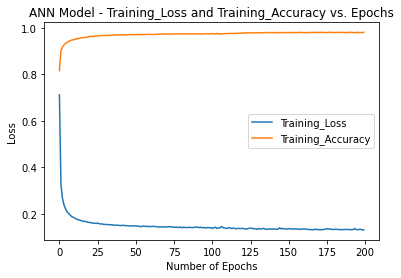

In [ ]:
h = pd.DataFrame(history.history)
h[['loss', 'accuracy']].plot()
plt.title('ANN Model - Training_Loss and Training_Accuracy vs. Epochs')
plt.xlabel('Number of Epochs')
plt.ylabel('Loss')
plt.legend(['Training_Loss', 'Training_Accuracy'])

plt.show()

In [ ]:
print("training_time ",training_time)

training_time  585.708566904068


In [ ]:
preds = ANN.predict(features_test)

In [ ]:
labels_test_predictions = np.argmax(preds, axis=1)

In [ ]:
labels_test_predictions[:], Labels_Test[:]

(array([12,  7, 12, ...,  8, 12,  0], dtype=int64),
 array([12,  7, 12, ...,  8, 12,  0]))

In [ ]:
confusion_ann = pd.crosstab(labels_test, labels_test_predictions)
confusion_ann

col_0,0,1,2,3,4,5,6,7,8,9,10,11,12,13
Label,,,,,,,,,,,,,,
benign,44475,704,54,15,45,110,0,58,29,24,37,86,2,160
bot,2,381,0,0,0,0,0,0,0,0,0,0,0,0
bruteforce,1,0,81,0,0,0,0,0,0,0,0,44,0,168
ddos,14,0,0,25521,0,5,0,0,0,0,0,0,0,0
ftppatator,2,0,0,0,1536,0,0,0,0,4,0,0,0,0
goldeneye,5,0,0,0,0,5727,0,0,2,0,1,16,0,0
hulk,0,0,0,0,0,0,777,0,0,0,0,0,0,0
portscan,35,0,0,0,0,0,0,31656,0,5,0,0,0,0
slowhttptest,4,0,0,0,0,2,0,0,1075,7,0,1,0,1


**Classification Report**

In [ ]:
classes = ['benign', 'bot', 'bruteforce', 'ddos', 'ftppatator', 'goldeneye','hulk','portscan','slowhttptest','slowloris','sql','sshpatator','synflood','xss']

In [ ]:
print(classification_report(Labels_Test, labels_test_predictions, target_names=classes, zero_division=0))

              precision    recall  f1-score   support

      benign       1.00      0.97      0.98     45799
         bot       0.35      0.99      0.52       383
  bruteforce       0.53      0.28      0.36       294
        ddos       1.00      1.00      1.00     25540
  ftppatator       0.97      1.00      0.98      1542
   goldeneye       0.98      1.00      0.99      5751
        hulk       1.00      1.00      1.00       777
    portscan       1.00      1.00      1.00     31696
slowhttptest       0.97      0.99      0.98      1090
   slowloris       0.96      0.99      0.98      1159
         sql       0.98      1.00      0.99      2373
  sshpatator       0.89      1.00      0.94      1219
    synflood       1.00      1.00      1.00     20418
         xss       0.28      0.86      0.42       148

    accuracy                           0.99    138189
   macro avg       0.85      0.93      0.87    138189
weighted avg       0.99      0.99      0.99    138189



In [ ]:
def print_status(labels, predictions):
  print("Accuracy = {}".format(accuracy_score(labels, predictions)))
  print("Precision = {}".format(precision_score(labels, predictions, average='macro', zero_division=0)))
  print("Recall = {}".format(recall_score(labels, predictions, average='macro')))


In [ ]:
print_status((Labels_Test).astype(int),(labels_test_predictions).astype(int))

Accuracy = 0.987864446518898
Precision = 0.8513068358005057
Recall = 0.9337619739431128


**Testing Samples**

In [ ]:
benign = pd.read_csv("C:/Users/Mr.Dmon/Documents/sample test data/benign_test.csv")
Featuresbenign = sc.transform(benign)
predsbenign = ANN.predict(Featuresbenign)
labels_test_predictions_benigntest = np.argmax(predsbenign, axis=1)
lbenigntest = labels_test_predictions_benigntest[:]
Lbenigntest = pd.DataFrame(lbenigntest, columns = ['Labels'])
Lbenigntest.value_counts()

Labels
0         1966
1           33
13           5
5            4
11           3
2            2
7            2
8            2
9            2
3            1
10           1
dtype: int64

In [ ]:
bruteforce = pd.read_csv("C:/Users/Mr.Dmon/Documents/sample test data/bruteforce_test.csv")
Featuresbruteforce = sc.transform(bruteforce)
predsbruteforce = ANN.predict(Featuresbruteforce)
labels_test_predictions_bruteforcetest = np.argmax(predsbruteforce, axis=1)
lbruteforcetest = labels_test_predictions_bruteforcetest[:]
Lbruteforcetest = pd.DataFrame(lbruteforcetest, columns = ['Labels'])
Lbruteforcetest.value_counts()

Labels
13        633
2         324
11         97
7           1
dtype: int64

In [ ]:
ftppatator = pd.read_csv("C:/Users/Mr.Dmon/Documents/sample test data/ftppatator_test.csv")
Featuresftppatator = sc.transform(ftppatator)
predsftppatator = ANN.predict(Featuresftppatator)
labels_test_predictions_ftppatatortest = np.argmax(predsftppatator, axis=1)
lftppatatortest = labels_test_predictions_ftppatatortest[:]
Lftppatatortest = pd.DataFrame(lftppatatortest, columns = ['Labels'])
Lftppatatortest.value_counts()

Labels
4         2054
0            4
9            4
11           1
13           1
dtype: int64

In [ ]:
goldeneye = pd.read_csv("C:/Users/Mr.Dmon/Documents/sample test data/goldeneye_test.csv")
Featuresgoldeneye = sc.transform(goldeneye)
predsgoldeneye = ANN.predict(Featuresgoldeneye)
labels_test_predictions_goldeneyetest = np.argmax(predsgoldeneye, axis=1)
lgoldeneyetest = labels_test_predictions_goldeneyetest[:]
Lgoldeneyetest = pd.DataFrame(lgoldeneyetest, columns = ['Labels'])
Lgoldeneyetest.value_counts()

Labels
5         2028
11           8
0            2
dtype: int64

In [ ]:
hulk = pd.read_csv("C:/Users/Mr.Dmon/Documents/sample test data/hulk_test.csv")
Featureshulk = sc.transform(hulk)
predshulk = ANN.predict(Featureshulk)
labels_test_predictions_hulktest = np.argmax(predshulk, axis=1)
lhulktest = labels_test_predictions_hulktest[:]
Lhulktest = pd.DataFrame(lhulktest, columns = ['Labels'])
Lhulktest.value_counts()

Labels
6         2020
dtype: int64

In [ ]:
portscan = pd.read_csv("C:/Users/Mr.Dmon/Documents/sample test data/portscan_test.csv")
Featuresportscan = sc.transform(portscan)
predsportscan = ANN.predict(Featuresportscan)
labels_test_predictions_portscantest = np.argmax(predsportscan, axis=1)
lportscantest = labels_test_predictions_portscantest[:]
Lportscantest = pd.DataFrame(lportscantest, columns = ['Labels'])
Lportscantest.value_counts()

Labels
7         2063
0            1
13           1
dtype: int64

In [ ]:
slowhttptest = pd.read_csv("C:/Users/Mr.Dmon/Documents/sample test data/slowhttptest_test.csv")
Featuresslowhttptest = sc.transform(slowhttptest)
predsslowhttptest = ANN.predict(Featuresslowhttptest)
labels_test_predictions_slowhttptesttest = np.argmax(predsslowhttptest, axis=1)
lslowhttptesttest = labels_test_predictions_slowhttptesttest[:]
Lslowhttptesttest = pd.DataFrame(lslowhttptesttest, columns = ['Labels'])
Lslowhttptesttest.value_counts()

Labels
8         2024
9            7
5            2
0            1
13           1
dtype: int64

In [ ]:
slowloris = pd.read_csv("C:/Users/Mr.Dmon/Documents/sample test data/slowloris_test.csv")
Featuresslowloris = sc.transform(slowloris)
predsslowloris = ANN.predict(Featuresslowloris)
labels_test_predictions_slowloristest = np.argmax(predsslowloris, axis=1)
lslowloristest = labels_test_predictions_slowloristest[:]
Lslowloristest = pd.DataFrame(lslowloristest, columns = ['Labels'])
Lslowloristest.value_counts()

Labels
9         2012
8           10
0            2
13           2
2            1
5            1
11           1
dtype: int64

In [ ]:
sql = pd.read_csv("C:/Users/Mr.Dmon/Documents/sample test data/sql_test.csv")
Featuressql = sc.transform(sql)
predssql = ANN.predict(Featuressql)
labels_test_predictions_sqltest = np.argmax(predssql, axis=1)
lsqltest = labels_test_predictions_sqltest[:]
Lsqltest = pd.DataFrame(lsqltest, columns = ['Labels'])
Lsqltest.value_counts()

Labels
10        2047
5            1
dtype: int64

In [ ]:
sshpatator = pd.read_csv("C:/Users/Mr.Dmon/Documents/sample test data/sshpatator_test.csv")
Featuressshpatator = sc.transform(sshpatator)
predssshpatator = ANN.predict(Featuressshpatator)
labels_test_predictions_sshpatatortest = np.argmax(predssshpatator, axis=1)
lsshpatatortest = labels_test_predictions_sshpatatortest[:]
Lsshpatatortest = pd.DataFrame(lsshpatatortest, columns = ['Labels'])
Lsshpatatortest.value_counts()

Labels
11        2057
9            4
0            2
4            1
dtype: int64

In [ ]:
synflood = pd.read_csv("C:/Users/Mr.Dmon/Documents/sample test data/synflood_test.csv")
Featuressynflood = sc.transform(synflood)
predssynflood = ANN.predict(Featuressynflood)
labels_test_predictions_synfloodtest = np.argmax(predssynflood, axis=1)
lsynfloodtest = labels_test_predictions_synfloodtest[:]
Lsynfloodtest = pd.DataFrame(lsynfloodtest, columns = ['Labels'])
Lsynfloodtest.value_counts()

Labels
12        2016
10           1
dtype: int64

In [ ]:
import joblib
from joblib import dump
from tensorflow.keras.models import load_model
dump(sc, 'scaler.bin', compress=True)
ANN.save('ANN.h5')